
\begin{center}
Chun-Yuan (Scott) Chiu
\end{center}
\begin{center}
chunyuac@andrew.cmu.edu
\end{center}

# 1. {-}

## Data Cleaning and Processing {-}

First we download the stock price data of Kellogg with various frequency. 

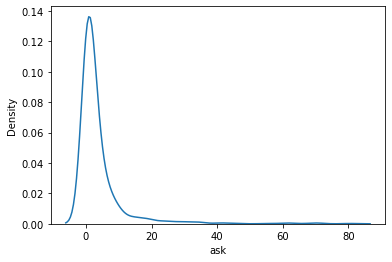

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('optionssample09302017.txt')

sns.kdeplot(df['ask'])
plt.show()

In [29]:
df.sort_values(by='timetoexpiry').tail()

,symbol,timetoexpiry,strike,last,bid,ask,volume,openint,curprice,histvol,implvol,bsval
578,KSU,475,125.0,4.70,5.6,6.20,13,15,108.680000,0.101142,0.240553,0.734413
436,TV,475,30.0,2.60,1.0,1.45,30,260,24.670000,0.125439,0.282314,0.153180
806,DFS,839,32.5,31.78,30.5,33.90,20,20,64.480003,0.179122,0.412508,32.003034
919,ALL,839,95.0,8.55,7.7,9.35,59,60,91.910004,0.223948,0.192198,11.112414
487,NCR,839,47.0,4.20,4.0,4.90,4000,4000,37.520000,0.234740,0.351553,2.367775


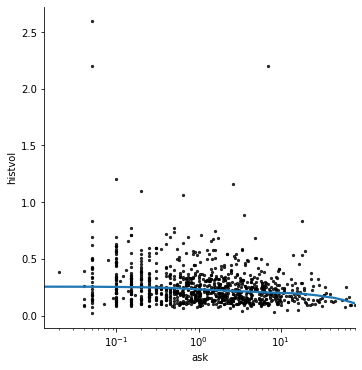

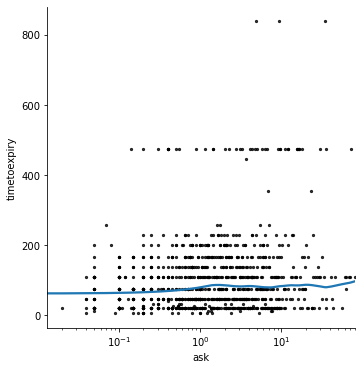

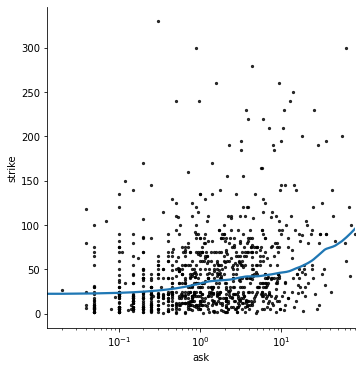

In [24]:
'''
histvol: happens to go down. without other info like K, T, ask can be anywhere

timetoexpiry: kind of makes sense; won't see long expiry with extremely low ask

strike: makes sense; whenever there is volume the current price can't be too far off the strike; so high strike means high current price which means high ask
'''
for response in ['histvol', 'timetoexpiry', 'strike']:
    grid = sns.lmplot(data=df, x='ask', y=response, lowess=True, scatter_kws={'s': 5, 'color': 'black'})
    grid.set(xscale='log')
    
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.subplot()


import pandas as pd

pd.read_csv()

In [1]:
import rpy2
%load_ext rpy2.ipython

In [2]:
%%R

library(fANCOVA)

R[write to console]: Error in library(fANCOVA) : there is no package called ‘fANCOVA’

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages




Error in library(fANCOVA) : there is no package called ‘fANCOVA’


In [6]:
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# sns.scatterplot(data=df, x='ask', y='histvol',      ax=axs[0])
# sns.scatterplot(data=df, x='ask', y='timetoexpiry', ax=axs[1])
# sns.scatterplot(data=df, x='ask', y='strike',       ax=axs[2])

# axs[0].set(xscale='log')
# axs[1].set(xscale='log')
# axs[2].set(xscale='log')

# plt.show()

In [23]:
import yfinance as yf
import numpy as np
import datetime

ldr = yf.download('K', period='max', interval='1d')
lwr = yf.download('K', period='max', interval='1wk')
lmr = yf.download('K', period='max', interval='1mo')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Then the log returns are computed. There are some missing data which we drop before taking logarithm. For weekly and monthly data, we also drop the last data points because the latest available data is not from end of a week or a month, making the last computed return not a weekly or monthly return. 

In [24]:
ldr = np.log(ldr['Adj Close'].dropna()).diff()[1:]
lwr = np.log(lwr['Adj Close'].dropna()).diff()[1:-1]
lmr = np.log(lmr['Adj Close'].dropna()).diff()[1:-1]

Take difference of the dates in the data to make sure they are indeed weekly/monthly returns. Below is the result for the weekly data, an ```np.unique()``` function call on which confirms that the the date differences are all 7 days. 

In [25]:
lwr.reset_index()['Date'].diff()[1:]

1      7 days
2      7 days
3      7 days
4      7 days
5      7 days
        ...  
2485   7 days
2486   7 days
2487   7 days
2488   7 days
2489   7 days
Name: Date, Length: 2489, dtype: timedelta64[ns]

Same for monthly data. ```np.unique()``` confirms that the date differences are either 28, 29, 30 or 31 days, so every data point is indeed a monthly return. 

In [26]:
lmr.reset_index()['Date'].diff()[1:]

1     31 days
2     30 days
3     31 days
4     30 days
5     31 days
        ...  
568   30 days
569   31 days
570   31 days
571   30 days
572   31 days
Name: Date, Length: 572, dtype: timedelta64[ns]

Finally take away the dates. Now there are 12041 daily returns, 2490 weekly returns and 573 monthly returns. 

In [27]:
ldr = ldr.values
lwr = lwr.values
lmr = lmr.values

len(ldr), len(lwr), len(lmr)

(12041, 2490, 573)

## Diagnostic Plots {-}

Below are the plots of fitted normal density functions and the KDEs inferred by the data. The densities are presented in both linear and log scale. The figures suggest that the normal distribution is a better model for weekly and monthly returns, compared to the daily return. 

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using silverman for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for 

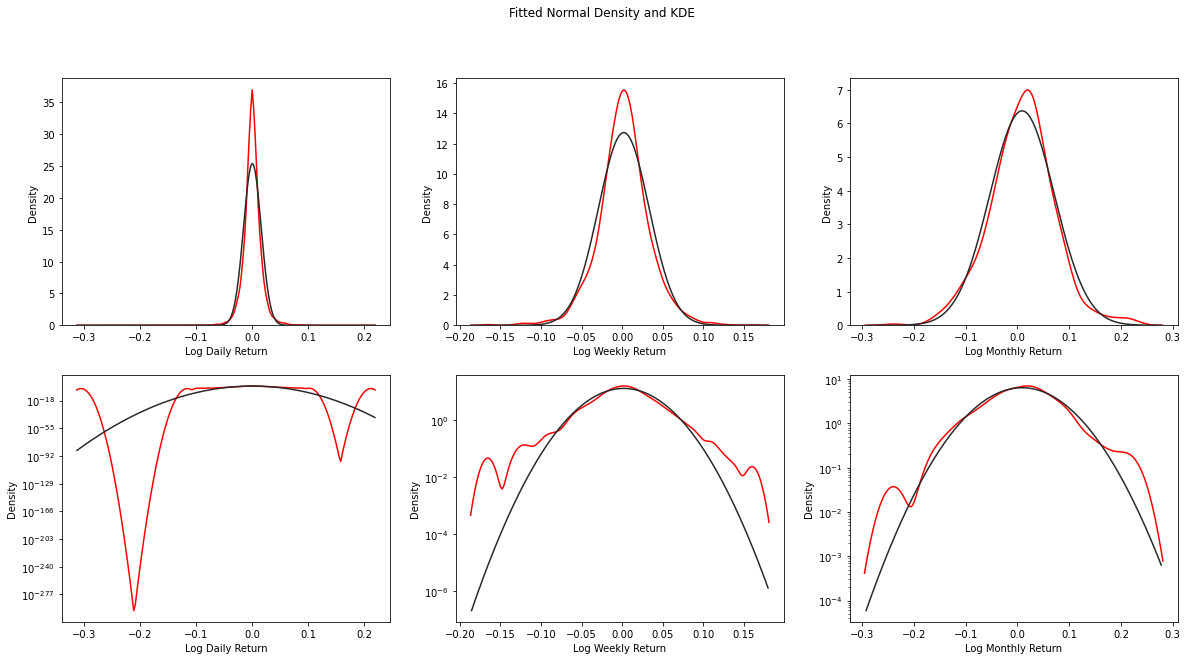

In [29]:
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Fitted Normal Density and KDE')

sns.distplot(ldr, hist=False, kde_kws={'bw': 'silverman'}, color='red', fit=stats.norm, ax=axs[0][0])
sns.distplot(lwr, hist=False, kde_kws={'bw': 'silverman'}, color='red', fit=stats.norm, ax=axs[0][1])
sns.distplot(lmr, hist=False, kde_kws={'bw': 'silverman'}, color='red', fit=stats.norm, ax=axs[0][2])

sns.distplot(ldr, hist=False, kde_kws={'bw': 'silverman'}, color='red', fit=stats.norm, ax=axs[1][0])
sns.distplot(lwr, hist=False, kde_kws={'bw': 'silverman'}, color='red', fit=stats.norm, ax=axs[1][1])
sns.distplot(lmr, hist=False, kde_kws={'bw': 'silverman'}, color='red', fit=stats.norm, ax=axs[1][2])

for j in range(3):
    axs[1][j].set(yscale='log')

for i in range(2):
    axs[i][0].set(xlabel='Log Daily Return')
    axs[i][1].set(xlabel='Log Weekly Return')
    axs[i][2].set(xlabel='Log Monthly Return')

plt.show()


Same conclusion can be made given the Q-Q plots. As shown below, although data from all three frequencies seem to have heavy tail, the daily returns look more so than others. 

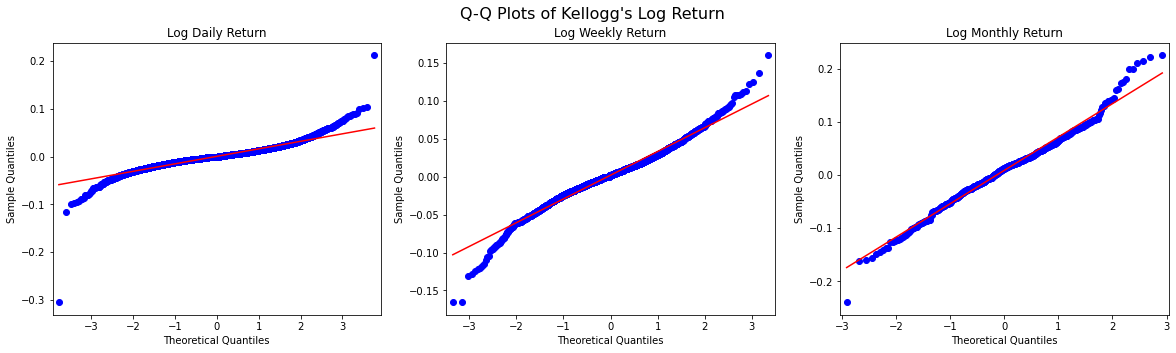

In [30]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Q-Q Plots of Kellogg's Log Return", fontsize=16)

qqplot(ldr, line='s', ax=axs[0])
qqplot(lwr, line='s', ax=axs[1])
qqplot(lmr, line='s', ax=axs[2])

axs[0].set(title='Log Daily Return')
axs[1].set(title='Log Weekly Return')
axs[2].set(title='Log Monthly Return')

plt.show()

## Formal Model Selection Tools {-}

For each frequency, we fit a nonstandard t distribution and a normal distribution to the data, and then compare the AICs. As the results shown below, for all frequencies the nonstandard t distribution always leads to a smaller AIC, indicating that it is a better model than normal. 

In [49]:
from pandas import DataFrame

dataSets = {'Daily': ldr, 'Weekly': lwr, 'Monthly': lmr}
models = {'Normal': stats.norm, 'Nonstandard t': stats.t}

aic = DataFrame(columns=dataSets.keys(), index=models.keys())
df = DataFrame(columns=dataSets.keys(), index=['df'])

for freq, data in dataSets.items():
    for modelName, model in models.items():
        params = model.fit(data)
        aic[freq][modelName] = -2*model.logpdf(data, *params).sum() + 2*len(params)
        if modelName == 'Nonstandard t':
            df[freq]['df'] = params[0]
            
aic


,Daily,Weekly,Monthly
Normal,-65851.8,-10174,-1544.93
Nonstandard t,-68294.5,-10358.3,-1560.48


However, when we print out the estimated degrees of freedom of the nonstandard t distribution, we do see that it increases as the frequency of the data decreases. So switching to weekly or monthly does make the return distribution less heavy-tailed. 

In [50]:
df

,Daily,Weekly,Monthly
df,3.35378,4.66227,6.88006


There are some normality tests implemented in scipy. Below we print out the $p$-values for 3 different tests for all data frequencies. All $p$-values are too small to justify the normality of the data, but lowering the data frequency does get us a larger $p$-value, indicating the data is "more normal". This is similar to the conclusion given by the above degrees of freedom table. 

In [72]:

tests = {"D'Agostino's K-squared": stats.normaltest, 
        'Jarque-Bera': stats.jarque_bera, 
        'Shapiro-Wilk': stats.shapiro
        }

pvalue = DataFrame(columns=dataSets.keys(), index=tests.keys())

for freq, data in dataSets.items():
    for testName, test in tests.items():
        pvalue[freq][testName] = test(data).pvalue

pvalue

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Daily,Weekly,Monthly
D'Agostino's K-squared,0,1.00559e-30,0.000900733
Jarque-Bera,0,0,1.54953e-06
Shapiro-Wilk,0,1.62833e-19,0.000102258


# 2. {-}

## Implementation Details {-}

To implement the ```fitSkewT()``` function we will need the log likelihood of the skewed generalized t distribution (SGT) and hence the pdf, which we implement as ```pdf()```. The implementation is straightforward from the original paper by Theodossiou (1998) with $x$ replaced by $x-\mu$ to add a shift to the distribution. To find the MLE we use a numerical optimization procedure, which requires an initial guess for each parameter. For $\mu, \sigma^2, k$ and $n$ we use the same initial guesses as in class, which are sample mean for $\mu$, sample variance for $\sigma^2$, $k=2$, $n=15$. 


To obtain an initial guess of $\lambda$ we make use of a property of SGT: If $X$ follows the SGT (with the shift $\mu=0$) then $P(X > 0) = (1+\lambda)/2$. This property is given by Theorem 2 in Theodossiou (1998). Adding the shift, this property says $P(X+\mu > \mu) = (1+\lambda)/2$, or equivalently $\lambda = 2P(X+\mu > \mu) -1$. Thus we compute the sample probability that the generated random number is greater than the shift, where shift is estimated by the sample mean. The sample probability is then multiplied by 2 and minus 1. The result is used as the initial guess of $\lambda$. 


In ```fitSkewT()``` we also call ```numdifftools.Hessian``` to compute the Hessian matrix of the log likelihood function at the MLE, the inverse of which is the covariance matrix of the MLE and is returned along with the MLE itself. 


To test the accuracy of the computed MLE, the cumulative distribution function and its inverse are also implemented (as ```cdf()``` and ```ppf()```, respectively). The implementation of ```cdf()``` again makes use of the property $P(X+\mu < \mu) = (1-\lambda)/2$, which implies that 
$$
F_{X+\mu}(c) = P(X+\mu < c) = (1-\lambda)/2 + \int_\mu^c f_X(x) dx, 
$$
where $F_{X+\mu}(x)$ is the desired cdf of SGT with drift, and $f_X(x)$ is the pdf of SGT *without* drift. Thus the computation of the cdf at any values of $c$ only involves a definite integral, which is easier and faster to compute numerically, compared to an improper integral. 


To compute ```ppf()``` at a given value $y$ is to find the solution of $F_{X+\mu}(x) - y = 0$, where $F_{X+\mu}(x)$ is given by ```cdf()```. We use Newton's method in ```scipy.optimize.root_scalar```. SGT with drift $\mu$ has a nice property that the peak is always at $\mu$, which means $\mu$ is the inflection point of $F_{X+\mu}(x) - y$. Thus, using $\mu$ as an initial guess, Newton's method is guaranteed to converge. 


Finally a ```rvs()``` function is implemented to generate SGT random numbers given sample size and parameters using the inverse transform sampling, which is straightforward given ```ppf()```. 

In [ ]:
from pandas import DataFrame
from scipy.special import beta
from scipy.optimize import minimize, root_scalar
from scipy.integrate import quad
from scipy import stats
import numpy as np
import numdifftools as nd

def pdf(x, mu, k, n, lam, sigma2, log=False):
    '''
    k > 0, n > 2, sigma2 > 0, -1 < lam < 1
    '''
    sigma = np.sqrt(sigma2)

    S = np.sqrt(1 + 3*(lam**2) - 4*(lam**2)*((beta(2/k, (n-1)/k)**2)/(beta(1/k, n/k)*beta(3/k, (n-2)/k))))
    c = 0.5*k*np.sqrt((beta(1/k, n/k)**(-3))*beta(3/k, (n-2)/k))*S/sigma
    theta = ((k/(n-2))**(1/k))*np.sqrt(beta(1/k, n/k)/beta(3/k, (n-2)/k))/S
    
    if log:
        return np.log(c)-(n+1)*np.log(1 + (k/(n-2))*(np.abs(x-mu)/(sigma*theta*(1 + np.sign(x-mu)*lam)))**k)/k
    else:
        return c*(1+(k/(n-2))*(np.abs(x-mu)/(sigma*theta*(1 + np.sign(x-mu)*lam)))**k)**(-(n+1)/k)

def cdf(x, mu, k, n, lam, sigma2):
    integrand = lambda u: pdf(u-mu, 0, k, n, lam, sigma2)
    return quad(integrand, mu, x)[0] + (1-lam)/2

def ppf(y, mu, k, n, lam, sigma2):
    assert 0 < y < 1, 'y must be in [0, 1].'  
    res = root_scalar(lambda x: cdf(x, mu, k, n, lam, sigma2)-y, method='newton', x0=mu, fprime=lambda x: pdf(x, mu, k, n, lam, sigma2))
    assert res.converged, "Newton's method failed to converge."
    return res.root

def rvs(size, mu, k, n, lam, sigma2):
    return np.array([ppf(u, mu, k, n, lam, sigma2) for u in np.random.uniform(size=size)])

def fitSkewT(x, allowshift=False):
    
    if(allowshift):
        initMu = np.mean(x)
        initpars = [initMu, 2, 15, 2*(np.array(x) > initMu).sum()/len(x)-1, np.var(x)]
        def negloglikelihood(params, x):
            mu, k, n, lam, sigma2 = params
            return (-1)*pdf(x, mu, k, n, lam, sigma2, log=True).sum()
        
        mleout = minimize(negloglikelihood, initpars, args=(x), method='L-BFGS-B', bounds=[(None, None), (0.001, None), (2.001, None), (-0.999, 0.999), (0.001, None)])
        hessfunc = nd.Hessian(negloglikelihood)
        return mleout.x, np.linalg.inv(hessfunc(mleout.x, x))
    
    else:
        initpars = [2, 15, 2*(np.array(x)>0).sum()/len(x)-1, np.var(x)]
        def negloglikelihood(params, x):
            k, n, lam, sigma2 = params
            return (-1)*pdf(x, 0, k, n, lam, sigma2, log=True).sum()
        
        mleout = minimize(negloglikelihood, initpars, args=(x), method='L-BFGS-B', bounds=[(0.001, None), (2.001, None), (-0.999, 0.999), (0.001, None)])
        hessfunc = nd.Hessian(negloglikelihood)
        mat = hessfunc(mleout.x, x)
        return mleout.x, np.linalg.inv(hessfunc(mleout.x, x))

## Test with $\mu=0$ {-}

Below we put everything together to test ```fitSkewT()```. First we run the test without shift, meaning $\mu=0$. 50,000 SGT random numbers are generated with parameters $k=2, n=10, \lambda=-0.5, \sigma^2=1$ and the MLE and its covariance matrix are computed. Despite the warning given by ```numdifftools.Hessian```, the results show that the MLE found is accurate and the true parameters are all covered in the corresponding confidence interval, which confirms that all functions are implemented correctly. 

A thorough debugging shows that the warnings are from ```numdifftools.Hessian```, which computes the 2nd derivative of a function $f$ using the finite difference method: 
\begin{align*}
f^{\prime\prime}(x) \approx \frac{f(x+\Delta x) - 2f(x) + f(x-\Delta x)}{\Delta x^2}. 
\end{align*}
Without careful controls, for example, $x-\Delta x$ may go out of the domain of $f$ when $x$ is close to zero and $f$ involves square root or logarithm which only takes positive numbers. To fix the warning would require to change the code in ```numdifftools.Hessian``` to take the extreme cases into consideration. 

In [4]:
size = 50000
k = 2
n = 10
lam = -0.5
sigma2 = 1
mu = 0

x = rvs(size, mu, k, n, lam, sigma2)

mle, var = fitSkewT(x, allowshift=False)
z = stats.norm.ppf(1-0.025)

print('MLE for k, n, lambda and sigma2: ', mle)
print()
print('Covariance matrix of the MLE: \n', DataFrame(var, columns=['k', 'n', 'lambda', 'sigma2'], index=['k', 'n', 'lambda', 'sigma2']))
print()
print('Confidence Intervals for the 4 parameters: ', [(mle[i] - z*np.sqrt(var[i][i]), mle[i] + z*np.sqrt(var[i][i])) for i in range(4)])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt

MLE for k, n, lambda and sigma2:  [ 2.00279629  9.18781764 -0.49442739  1.00352337]

Covariance matrix of the MLE: 
                k         n    lambda    sigma2
k       0.002139 -0.029235 -0.000002  0.000015
n      -0.029235  0.517771  0.000035 -0.001835
lambda -0.000002  0.000035  0.000006 -0.000003
sigma2  0.000015 -0.001835 -0.000003  0.000078

Confidence Intervals for the 4 parameters:  [(1.9121427083818585, 2.0934498809955633), (7.777500203504956, 10.598135080701034), (-0.49923916883011465, -0.4896156039852224), (0.986254867355361, 1.0207918723970564)]


## Test with Nonzero Shift

Next we run the same test but with a nonzero shift $\mu=1.5$. 50,000 SGT random numbers are generated with the same parameters as above and the MLE and its covariance matrix are computed. Again, despite the warning given by ```numdifftools.Hessian```, the results show that the MLE found is accurate, indicating that the implementation with nonzero shift is correct. 

In [5]:
size = 50000
k = 2
n = 10
lam = -0.5
sigma2 = 1
mu = 1.5

x = rvs(size, mu, k, n, lam, sigma2)

mle, var = fitSkewT(x, allowshift=True)
z = stats.norm.ppf(1-0.025)

print('MLE for mu, k, n, lambda and sigma2: ', mle)
print()
print('Covariance matrix of the MLE: \n', DataFrame(var, columns=['mu', 'k', 'n', 'lambda', 'sigma2'], index=['mu', 'k', 'n', 'lambda', 'sigma2']))
print()
print('Confidence Intervals for the 5 parameters: ', [(mle[i] - z*np.sqrt(var[i][i]), mle[i] + z*np.sqrt(var[i][i])) for i in range(5)])


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


MLE for mu, k, n, lambda and sigma2:  [ 1.52455894  1.99154301 10.0033813  -0.5161979   1.00705431]

Covariance matrix of the MLE: 
               mu         k         n    lambda    sigma2
mu      0.000064  0.000009 -0.000134 -0.000040  0.000022
k       0.000009  0.002111 -0.034118 -0.000005  0.000004
n      -0.000134 -0.034118  0.713508  0.000073 -0.001866
lambda -0.000040 -0.000005  0.000073  0.000031 -0.000017
sigma2  0.000022  0.000004 -0.001866 -0.000017  0.000082

Confidence Intervals for the 5 parameters:  [(1.5089083422544234, 1.5402095409151402), (1.9014922791252897, 2.081593742225219), (8.347811605534284, 11.658951003649657), (-0.5270349447867958, -0.5053608469149563), (0.9892791548484049, 1.0248294619946112)]


# 3. {-}

## (a) {-}

First we download the data. There are 2262 daily log returns. 

In [80]:
import yfinance as yf
import numpy as np

ldrK = np.log(yf.download('K', start='2010-01-01', end='2018-12-31')['Adj Close']).diff()[1:]
len(ldrK)

[*********************100%***********************]  1 of 1 completed


2262

For each estimation method we use the bootstrap to estimate the standard error. Specifically, first we randomly draw 2,000 sample daily log returns with replacement from the full data, and then use these sample points to compute the 4 estimates. This is repeated 500 times. Each time we will get slightly different estimates. Thus for each estimation method we will get 500 sample estimates. We then compute the mean and the standard error over the 500 sample estimates and use them as the estimate of $p$ and its standard error. The results are shown in the below table. 

In [79]:
import statsmodels.api as sm
from scipy import stats
from scipy.interpolate import interp1d
from random import choices
from pandas import DataFrame

threshold = -0.025

estimates = []
for i in range(500):
    data = choices(ldrK, k=2000)
    d = {'Proportion': (np.array(data) < threshold).sum()/len(data)}
    
    params = stats.norm.fit(data)
    d['Normal'] = stats.norm.cdf(threshold, *params)
    
    params = stats.t.fit(data)
    d['Nonstandard t'] = stats.t.cdf(threshold, *params)

    kde = sm.nonparametric.KDEUnivariate(data).fit()
    kde.support = np.array(threshold)
    d['KDE'] = kde.cdf[0]

    estimates.append(d)


DataFrame(estimates).describe().iloc[1:3, :]
    

,Proportion,Normal,Nonstandard t,KDE
mean,0.016857,0.010320,0.016346,0.017377
std,0.002760,0.002371,0.002648,0.002581


## (b) {-}

Using the tail probability from a fitted normal distribution gives the smallest standard error, but that does not mean this is the best choice to estimate $p$. All the analysis in class and in Question 1 above have shown that stock daily log return distribution has heavy tail and hence the normal distribution is not a good model. As shown in the table above, the normal model has the smallest estimate of $p$, which means, compared to other models, it is more likely to underestimate the probability of a large drop. In fact, the tendency to underestimate $p$ is also the reason it has the smallest standard error. On average the 500 sample estimates of $p$ under the normal model are smaller than other models. Since they are closer to zero, the standard deviation (standard error) will also be smaller. 